In [2]:
data = [
    {'continent': 'Europe', 'country': 'Russia', 'city': 'Moscow', 'population': 12380664},
    {'continent': 'Europe', 'country': 'Russia', 'city': 'Saint Petersburg', 'population': 5281579},
    {'continent': 'Europe', 'country': 'Russia', 'city': 'Novosibirsk', 'population': 1602915},
    {'continent': 'Europe', 'country': 'Russia', 'city': 'Yekaterinburg', 'population': 1455514},
    {'continent': 'Europe', 'country': 'Germany', 'city': 'Berlin', 'population': 1234},
    {'continent': 'Europe', 'country': 'Germany', 'city': 'Munich', 'population': 1234},
    {'continent': 'Europe', 'country': 'Germany', 'city': 'Hamburg', 'population': 1234},
    {'continent': 'Europe', 'country': 'France', 'city': 'Paris', 'population': 1234},
    {'continent': 'Europe', 'country': 'France', 'city': 'Paris', 'population': 1234},
    {'continent': 'Europe', 'country': 'France', 'city': 'Paris', 'population': 1234},
    {'continent': 'Europe', 'country': 'France', 'city': 'Paris', 'population': 1234},
    {'continent': 'Europe', 'country': 'France', 'city': 'Paris', 'population': 1234},
    {'continent': 'Europe', 'country': 'Great Britain', 'city': 'London', 'population': 1234},

    {'continent': 'Asia', 'country': 'Japan', 'city': 'Tokyo', 'population': 1234},
    {'continent': 'Asia', 'country': 'Japan', 'city': 'Osaka', 'population': 1234},
    {'continent': 'Asia', 'country': 'Japan', 'city': 'Nagoya', 'population': 1234},
    {'continent': 'Asia', 'country': 'China', 'city': 'Beijing', 'population': 1234},
    {'continent': 'Asia', 'country': 'China', 'city': 'Shanghai', 'population': 1234},
    {'continent': 'Asia', 'country': 'China', 'city': 'Shenzhen', 'population': 1234},
    {'continent': 'Asia', 'country': 'India', 'city': 'New Delhi', 'population': 1234},
    {'continent': 'Asia', 'country': 'India', 'city': 'Mumbai', 'population': 1234},
    {'continent': 'Asia', 'country': 'India', 'city': 'Pune', 'population': 1234},
    {'continent': 'North America', 'country': 'USA', 'city': 'New York', 'population': 1234},
    {'continent': 'North America', 'country': 'USA', 'city': 'Chicago', 'population': 1234},
    {'continent': 'North America', 'country': 'USA', 'city': 'Washington', 'population': 1234},
]

In [3]:
import pandas as pd
df = pd.DataFrame(data)

In [14]:
df.head()

,city,continent,country,population
0,Moscow,Europe,Russia,12380664
1,Saint Petersburg,Europe,Russia,5281579
2,Novosibirsk,Europe,Russia,1602915
3,Yekaterinburg,Europe,Russia,1455514
4,Berlin,Europe,Germany,1234


In [7]:
def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l[i]
        res.append(s / sum(l))
    return res

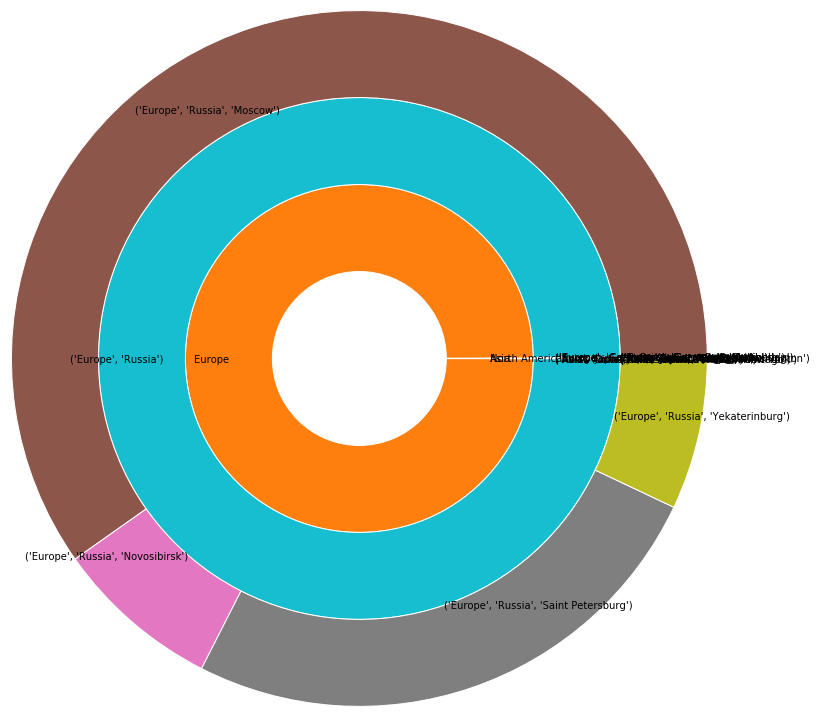

In [88]:
import matplotlib.pyplot as plt

# Multi-layer pie chart with distribution

lnum = 0

layers = ['continent', 'country', 'city']
value = 'population'

plt.axis("equal")

for layer in layers:
    radius = lnum + 2
    width = 1
    frame = df.groupby(layers[:lnum+1]).sum()
    plt.pie(frame, labels=frame.index, radius=radius, wedgeprops=dict(width=width, edgecolor='w'), labeldistance=0.75)
    lnum += 1
